# Dimensionality Reduction
## Principal Components Analysis (PCA)

Principal Components Analysis (PCA) is a statistical technique used for dimensionality reduction and data transformation. It aims to identify the directions (principal components) in which the data varies the most, and represents the data in a new coordinate system defined by these components.

The key idea behind PCA is to find a lower-dimensional representation of the data that captures the maximum amount of variance. It achieves this through an orthogonal projection of the original features into a smaller set of uncorrelated variables, called principal components. The first principal component is the direction that captures the most amount of variance in the data, followed by the second principal component, and so on. The principal components are linear combinations of the original features. 

Here's a step-by-step overview of how PCA works:
- **Standardize the data:** If the features have different scales or units, it is important to standardize the data by subtracting the mean and dividing by the standard deviation. This step ensures that all features are on a similar scale and prevents dominance by features with larger variances.

- **Compute the covariance matrix:** The covariance matrix is computed to understand the relationships and dependencies between the different features in the data.

- **Perform eigendecomposition:** The covariance matrix is decomposed into its eigenvectors and eigenvalues. The eigenvectors represent the principal components, and the eigenvalues indicate the amount of variance explained by each principal component.

- **Select a number of principal components:** The principal components are ranked based on their corresponding eigenvalues, and the top components capturing the most variance are selected. The number of principal components to retain depends on thedesired level of dimensionality reduction.

- **Project the data onto the coordinate system defined by the chosen components:** The original data is transformed by projecting it onto the selected principal components. Each data point is represented by its new coordinates in the principal component space.

PCA is a powerful tool for exploratory data analysis, visualization, and feature extraction. It helps to identify patterns, reduce noise, and provide a concise representation of the data. PCA is widely used in various fields, including image processing, signal processing, genetics, finance, and social sciences, where dimensionality reduction and data compression are necessary.

<img src="./images/projplane.gif" width="400"/>

### General procedure (by hand)

Let's start by coding the algorithm by hand. Later on, we'll use Sklearn's PCA and project your data into the two first principal components

1. Standardize the data
2. Calculate the covariance matrix
3. Calculate the eigenvalues and eigenvectors of the covariance matrix
4. Select the most significant components (~95%) or the first two in case you want to visualize the projection
5. Transform the data

Here is a list of all the packages you'll need for today's lab:

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

For our first example, we'll generate 50 random data points close to the line $y=2x$. 

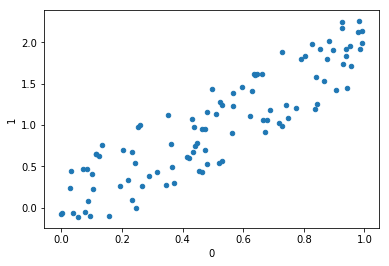

In [9]:
x = np.random.rand(100)
y = 2*x + np.random.rand(100)-0.5
df = pd.DataFrame(np.array([x,y]).T)
df.plot.scatter(x=0,y=1)
plt.show()

The code below performs all the needed operations by hand. Can you interpret it? 

In [10]:
# Task 1: In each step below
# 1- indicate what the code is doing. 
# 2- identify what each of the "hidden" variables v1,..,v6 represent

# Step 1: 
v1 =(df-df.mean())/df.std()
#v1: 

# Step 2:  
v2 = np.cov(v1.T)
#v2: 

# Step 3: 
v3, v4 = np.linalg.eigh(v2)
#v3:
#v4: 

# Step 4: 
v5 = 1
#v5: 

# Step 5:  
v6 = np.dot(v1, v4[:,1:2]).flatten()
#v6: 

# Step 6: 
plt.scatter(v6, np.zeros_like(v6))
print(v6)

This process, can be automated using the `sklearn` package PCA, as shown in the code below.

In [4]:
# Task 2: Edit the code below to obtain the same result as in the previous part using the built-in function:

# standardize data and choose number of components
sdf =  #
n_components =  #

# apply PCA and project
pca = PCA(n_components=n_components)
psdf = pca.fit_transform(sdf)

# print and plot the final result. May need to change the sign
plt.scatter(psdf, np.zeros_like(psdf))
print(psdf.flatten())

### Variance of Principal Components
Finally, one may be interested if finding the expression of the principal components. This can be done readily:

In [6]:
# Task: interpret the results of the code below in light of the original data.

# Principal component 
print(pca.components_)

# Proportion of the variance explained
print(pca.explained_variance_ratio_)

# Now lets compare it to the same for the non-standardized data:
pdf = pca.fit_transform(df-df.mean())
print(pca.components_)
print(pca.explained_variance_ratio_)

## Dataset in R3

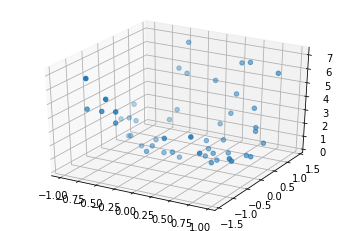

In [11]:
#Task: The code below generates 50 random points in R3. Plot the 1D and 2D principal
# components analysis projections. Advanced: color the points by their z value. 
x = 2*np.random.rand(50)-1
y = 3*np.random.rand(50)-1.5
z = x**2 + 3*y**2 + np.random.rand(50)
df = pd.DataFrame(np.array([x, y, z]).T)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z)
plt.show()

# Find PCA projection onto one component and plot it


# Find PCA projection onto two components and plot it


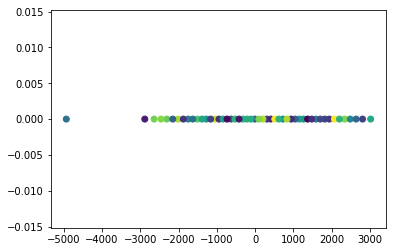

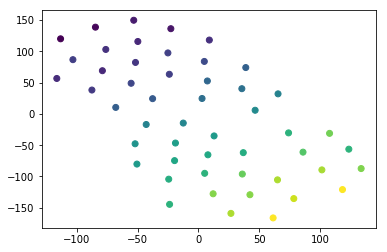

In [10]:
# Task: Replace PCA by TSNE in the code above to generate a 1D and 2D projections of the data using t-SNE 

# t-SNE for 1 dimension

# t-SNE for 2 dimensions

# Example Dataset I
## 🌸 Iris Classification

The **Iris dataset** is a classic dataset used in statistics and machine learning. It contains measurements of iris flowers from three different species. The dataset contains samples of flowers consisting of four characteristics, and labeled by the corresponding flower species.

- **Total samples**: 150
- **Classes**: 3 iris species
  - *Setosa*
  - *Versicolor*
  - *Virginica*
- **Features**: 4 numeric measurements (in cm)

| Feature             | Description                           |
|---------------------|---------------------------------------|
| `sepal length`      | Length of the sepal (outer part)      |
| `sepal width`       | Width of the sepal                    |
| `petal length`      | Length of the petal (inner part)      |
| `petal width`       | Width of the petal                    |

---

An example of an individual sample looks like this:

| Sepal Length | Sepal Width | Petal Length | Petal Width | Species     |
|--------------|-------------|--------------|-------------|-------------|
| 5.1          | 3.5         | 1.4          | 0.2         | Setosa      |

---

The Iris dataset is widely used to:

- Practice **classification** (e.g., logistic regression, decision trees, SVMs)
- Apply **dimensionality reduction** (e.g., PCA, t-SNE)
- Explore **clustering** (e.g., k-means)
- Visualize data in 2D and 3D
- Test basic machine learning workflows

---

We'll start by loading the Dataset in Python

Using **scikit-learn**:
```python
from sklearn.datasets import load_iris

data = load_iris()
X = data.data       # shape: (150, 4)
y = data.target     # 0 = Setosa, 1 = Versicolor, 2 = Virginica


In [17]:
from sklearn.datasets import load_iris

# iris is a python dictionary with the following keys:
iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [12]:
# Task: Exploratory analysis

# Find the number of irises of each type present in the dataset

# Find the variance of sepal length

# Find the covariance between petal length and petal width


In [13]:
# Task: Create a 3D visualization of the dataset by picking your 3 favorite characteristics
# Create a dataset that contains only 3 of the 4 original characteristic


# Plot a 3D visualization of the new dataset. In your plot, different species should be represented 
# in different colors. Add a legend indicating which species corresponds to each color.


In [14]:
# Task: Create a 3D visualization of the dataset using t-SNE. In your plot, different species should
# be represented in different colors. Add a legend indicating which species corresponds to each color. 



In [ ]:
#Task: compare the two plots you produced. Which one seems to be better at differentiating the data?


# Example Dataset II
## MNIST: Handwritten Digits
In this activity, you’ll explore how to apply **Principal Component Analysis (PCA)** to the **MNIST handwritten digits dataset**.

We'll use PCA to:
- Understand variance in image data
- Reduce the dimensionality of digit images
- Visualize high-dimensional data in 2D



In [19]:
# Load the MNIST-like digits dataset from scikit-learn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X = digits.data  
Y = digits.target

# Standardize X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Task: exploratory data analysis 
# Find how many images are there in total?

# Find the dimensions (number of pixels of each image)


In [20]:
# Task: exploratory data analysis (more advanced)
# Find the variances of all pixels

# Find rows and columns of the pixels in the image with the highest and lowest variances respectively

# Find the two pixels that are more positively correlated (even more advanced)

# Find the two pixels that are more negatively correlated (even more advanced)

42
0


## 🔍 Visualize Sample Digits

Let’s take a look at a few sample images from the dataset to understand what we're working with.


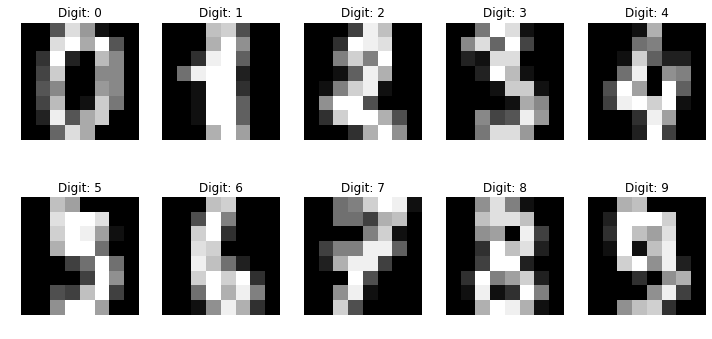

In [21]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Digit: {digits.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [15]:
#Task: plot a 2D projection of your original data using PCA. As a bonus, try to color each digit in a
# different color. 


In [16]:
#Task: find the overall ratio of variance explained by the first two components using pca.explained_variance_ratio_


In [17]:
#Task: plot a 2D projection of your original data using t-SNE. As a bonus, try to color each digit in a different color. 


In [18]:
# Task: create a scree plot of the variance of each component
# Hint: you can use pca_full.explained_variance_ratio_ to generate a vector with these variances
# Hint: the horizontal axis should indicate each component, and the vertical axes the corresponding variance proportion

## Example Dataset III: Dogs, Cats and Birds

The CIFAR 10 dataset contains 60000 images of ten different categories: airplane, automobile, bird, cat, deer,
dog, frog, horse, ship, truck. Each image is small (32×32 RGB), making the dataset lightweight and ideal for fast experimentation with deep learning models.

##### Content

This image dataset is a subset of the CIFAR 10, and has just 150 images of dogs, cats and birds. 

##### Exploration

The idea here is to perform PCA to represent the data in 2D or 3D, and decide whether we can or cannot see three different clusters. Feel free to explore other properties of the dataset!

In [27]:
# load dataset
df = np.loadtxt('data/catdogbird.csv', delimiter=',')

# images
X = df[:,:-1]

# labels
Y = df[:,-1]

In [259]:
#Task: create 2D and 3D projections of the data using your favorite dimensional reduction algorithm. Conclude whether



# 📚 Dimensionality Reduction Reading List

## 🔰 Beginner-Level
### Introductory Concepts
- [StatQuest: Dimensionality Reduction](https://www.youtube.com/playlist?list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1) – *YouTube series by Josh Starmer*
- ["A Visual Introduction to Dimensionality Reduction"](https://www.distill.pub/2016/misread-tsne/) – *Distill.pub*
- [scikit-learn User Guide: Dimensionality Reduction](https://scikit-learn.org/stable/modules/unsupervised_reduction.html) – *Official scikit-learn docs*

## 📘 Intermediate-Level
### Theory and Applications
- *"Pattern Recognition and Machine Learning"* by Christopher Bishop – **Ch. 12: PCA**
- ["Visualizing Data using t-SNE" (Maaten & Hinton, 2008)](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)
- ["How to Use t-SNE Effectively"](https://distill.pub/2016/misread-tsne/)
- [UMAP: Uniform Manifold Approximation and Projection](https://umap-learn.readthedocs.io/en/latest/how_umap_works.html) – *UMAP docs with explanation of math*

## 📗 Advanced-Level
### Mathematical and Algorithmic Details
- ["The Elements of Statistical Learning" (Hastie, Tibshirani, Friedman)](https://web.stanford.edu/~hastie/ElemStatLearn/) – **Ch. 14: Unsupervised Learning**
- *"Nonlinear Dimensionality Reduction"* (Review paper: van der Maaten et al., 2009)
- ["Manifold Learning: The Do's and Don'ts"](https://arxiv.org/abs/0912.3846) – *Critically reviews manifold methods*
- ["UMAP: A New Approach to Dimensionality Reduction"](https://arxiv.org/abs/1802.03426) – *Original UMAP paper*

## 🛠 Practice and Tools
- [`scikit-learn`](https://scikit-learn.org/stable/modules/manifold.html) – Implements PCA, t-SNE, Isomap, MDS, LLE, etc.
- [`umap-learn` GitHub](https://github.com/lmcinnes/umap) – Python implementation and examples
- [`scanpy`](https://scanpy.readthedocs.io/) – Single-cell gene expression + dimensionality reduction workflows
- [`OpenTSNE`](https://opentsne.readthedocs.io/en/latest/) – Fast and reproducible t-SNE

## 🧪 Datasets for Practice
- [MNIST](http://yann.lecun.com/exdb/mnist/)
- [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
- [PBMC 3k (10x Genomics)](https://scanpy.readthedocs.io/en/stable/generated/scanpy.datasets.pbmc3k.html)
- [TCGA Gene Expression (UCSC Xena)](https://xenabrowser.net/)